## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [12]:
ufo_df = pd.read_csv("ufo_sightings.csv")
ufo_df.head()

,#,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Described_Duration,Description,Date_Documented,Latitude,Longitude
0,0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,1,10/10/1949 21:00,Lackland Afb,TX,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,2,10/10/1955 17:00,Chester (Uk/England),NaN,GB,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,3,10/10/1956 21:00,Edna,TX,US,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [13]:
ufo_non_null = ufo_df.dropna()

ufo_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 64682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    53562 non-null  int64  
 1   Date_Time            53562 non-null  object 
 2   City                 53562 non-null  object 
 3   State/Province       53562 non-null  object 
 4   Country              53562 non-null  object 
 5   UFO_Shape            53562 non-null  object 
 6   Length_of_Encounter  53562 non-null  float64
 7   Described_Duration   53562 non-null  object 
 8   Description          53562 non-null  object 
 9   Date_Documented      53562 non-null  object 
 10  Latitude             53562 non-null  float64
 11  Longitude            53562 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.3+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [14]:
filtered_ufo_df = ufo_non_null.drop(["Described_Duration","Date_Documented","Description"], axis=1)

filtered_ufo_df.head()

,#,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
0,0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [15]:
filtered_ufo_df["Date_Time"] = pd.to_datetime(filtered_ufo_df["Date_Time"]);

filtered_ufo_df.head()

,#,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
0,0,1949-10-10 20:30:00,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,3,1956-10-10 21:00:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,4,1960-10-10 20:00:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,5,1961-10-10 19:00:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,7,1965-10-10 23:45:00,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

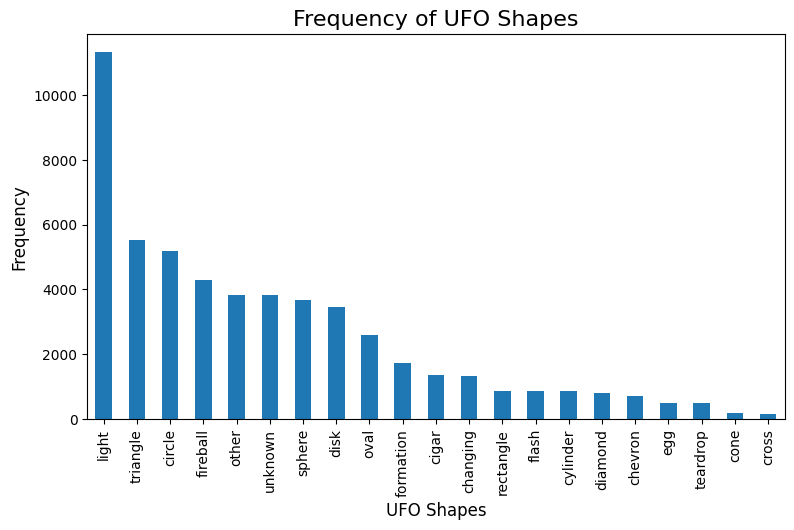

In [17]:
ufo_shapes = filtered_ufo_df["UFO_Shape"].value_counts()

bar_plot = ufo_shapes.plot.bar(figsize= (9,5))

plt.title("Frequency of UFO Shapes", fontsize=16)

plt.xlabel("UFO Shapes", fontsize=12)

plt.ylabel("Frequency", fontsize=12);



### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

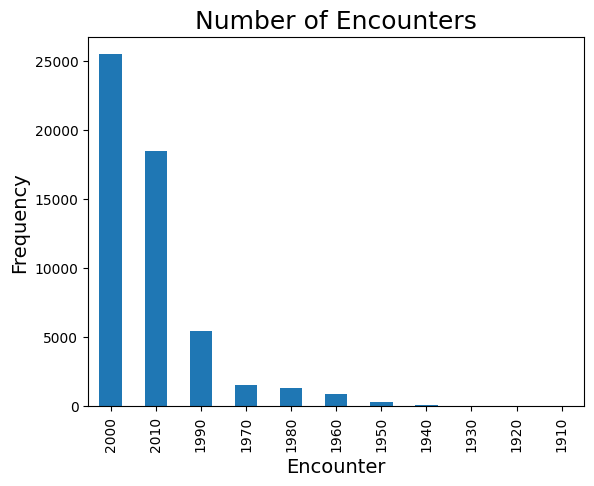

In [18]:
filtered_ufo_df["Year"] = filtered_ufo_df["Date_Time"].dt.year

filtered_ufo_df["Encounters_by_Decade"] = (filtered_ufo_df["Year"] // 10) * 10

filtered_ufo_df["Encounters_by_Decade"].value_counts().plot.bar()

plt.xlabel("Encounter", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14)

plt.title("Number of Encounters", fontsize = 18);


### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

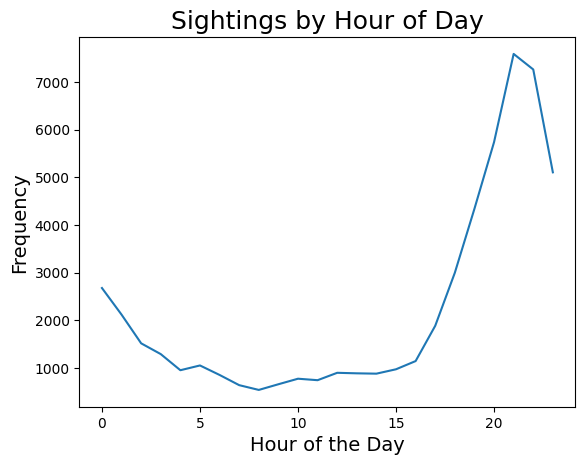

In [20]:
filtered_ufo_df["Hour_of_the_Day"] = filtered_ufo_df["Date_Time"].dt.hour
#filtered_ufo_df.head()

filtered_ufo_df["Hour_of_the_Day"].value_counts().sort_index().plot.line(x= "Hour", y= "Frequency");

plt.xlabel("Hour of the Day", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14)

plt.title("Sightings by Hour of Day", fontsize= 18);


### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Q1 Answer: According to the data the most frequently reported shape of the UFOs sighted was just a glowing light.

2. Which shape is least frequently reported?
    * Q2 Answer: The least reported shape would be the cross shape. 

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * Q3 Answer: From what I have gathered the most common time of day for there to be sightings would be later in the evenings around 10:00pm.

4. Are there other factors that may account for this pattern in the data?
    * Q4 Answer: I believe the commonality in the sighting is that they are more frequently seen at night when the sky is the darkest.

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * Q5 Answer: I did notice that the sightings grew more in the more recent decades and I believe that could be due to the advancements in technology and platforms for individuals to share their encounters which could garner more interest for those searching.

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * Q6 Answer:Based off of the information provided, I would inform those interested to look for a glowing light between the hours of 9-11:00pm. 


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

In [80]:
filtered_ufo_df["State/Province"["TN","VA","WI"]].value_counts().sort_index().plot.bar()



<>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\bcabb\AppData\Local\Temp\ipykernel_24852\505397006.py:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
  filtered_ufo_df["State/Province"["TN","VA","WI"]].value_counts().sort_index().plot.bar()
C:\Users\bcabb\AppData\Local\Temp\ipykernel_24852\505397006.py:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
  filtered_ufo_df["State/Province"["TN","VA","WI"]].value_counts().sort_index().plot.bar()
C:\Users\bcabb\AppData\Local\Temp\ipykernel_24852\505397006.py:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
  filtered_ufo_df["State/Province"["TN","VA","WI"]].value_counts().sort_index().plot.bar()
C:\Users\bcabb\AppData\Local\Temp\ipykernel_248

TypeError: string indices must be integers